In [1]:
#Importing the DEPENDENCIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [3]:
#Importing the Boston House Price Dataset

In [4]:
house_price_dataset = pd.read_csv("housing_Data.csv")
house_price_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#checking the number of rows and colums
house_price_dataset.shape

(545, 13)

In [6]:
#checking are there any missing values
house_price_dataset.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [7]:
#statistical measures of the dataset
house_price_dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Understanding the Correlation between various features in the DATASET

TYPES OF CORRELATION :
1.POSITIVE CORRELATION
2.NEGATIVE CORRELATION

In [8]:
correlation = house_price_dataset.corr(numeric_only=True)

<Axes: >

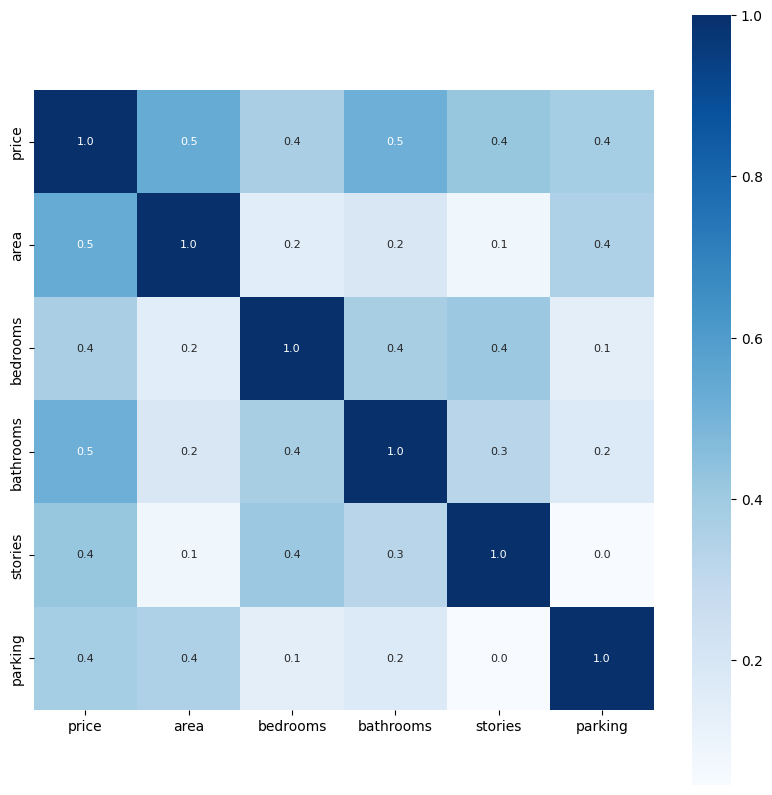

In [9]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

SPLITTING THE DATA AND TARGET

In [10]:
x = house_price_dataset.drop(['price'], axis=1)
y = house_price_dataset['price']

In [11]:
print(x)
print(y)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

SPLLITING THE DATA INTO TRAINING DATA AND TEST DATA



In [12]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)

In [13]:
print(x.shape , x_train.shape , x_test.shape)

(545, 12) (436, 12) (109, 12)


TRAINING THE MODEL

XGBOOST REGRESSOR MODEL

In [14]:
#loading the model
model = XGBRegressor()

In [15]:
# Convert all object columns to pandas 'category'
for col in x.select_dtypes(include=['object']).columns:
    x[col] = x[col].astype('category')

# Verify conversion worked
print(x.dtypes)

# Split again after conversion
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Train with categorical support
model = XGBRegressor(enable_categorical=True)
model.fit(x_train, y_train)

area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

PREDICTION ON TRAINING DATA

In [16]:
#ACCURACY FOR PREDICTION ON TRAINING DATA
training_data_prediction = model.predict(x_train)
print(training_data_prediction)

[ 3437637.5  4266591.   2668082.5  4787158.   4200143.   6989735.5
  2939936.5  2664837.2  6930625.5  4766770.   3323263.8  2949949.2
  6027032.5  5817667.   7800610.   4129446.5  5198711.5  4634231.5
  7822496.5  4230385.5  4177434.8  2658310.5  5234440.   4378945.
  3920028.2  4029942.5  6796436.5  9233010.   4665360.5  3161739.8
  3771301.8  3067605.5  2373787.2  4022908.   4262040.   2907373.2
  4880897.   3655500.   1917677.5  7985126.5  4092745.  12187961.
  8527664.   7397872.5  4025292.5  3215165.2  4296617.   3597510.8
  3375032.5  2506003.   5914839.5  4022023.5  3861385.5  3209968.8
  4135265.8  5314606.5  3640324.   3809019.8  3624571.5  4196324.
  7481135.   4265552.   5931341.   2788854.8  3803684.8  5540266.5
  6672290.5  5862087.5  5498747.   5596531.5  3316246.5  3617889.8
  2822821.   4869773.   5257766.   3721025.   5894736.5  4226604.5
  6762519.   5394233.   3085471.5  3579544.5  6656209.   4917530.5
  5876136.5  8387199.   2717370.2  3278769.   9782583.   4127400.

In [17]:
#R SQUARE ERROR
score_1 = metrics.r2_score(y_train , training_data_prediction)

#mean absolute error
score_2 = metrics.mean_absolute_error(y_train , training_data_prediction)

print("R squared error : " , score_1)
print('Mean Absolue Error : ', score_2)

R squared error :  0.9975634813308716
Mean Absolue Error :  47851.1796875


PREDICTION ON TEST DATA

In [18]:
#ACCURACY FOR PREDICTION ON TRAINING DATA
test_data_prediction = model.predict(x_train)
print(test_data_prediction)

[ 3437637.5  4266591.   2668082.5  4787158.   4200143.   6989735.5
  2939936.5  2664837.2  6930625.5  4766770.   3323263.8  2949949.2
  6027032.5  5817667.   7800610.   4129446.5  5198711.5  4634231.5
  7822496.5  4230385.5  4177434.8  2658310.5  5234440.   4378945.
  3920028.2  4029942.5  6796436.5  9233010.   4665360.5  3161739.8
  3771301.8  3067605.5  2373787.2  4022908.   4262040.   2907373.2
  4880897.   3655500.   1917677.5  7985126.5  4092745.  12187961.
  8527664.   7397872.5  4025292.5  3215165.2  4296617.   3597510.8
  3375032.5  2506003.   5914839.5  4022023.5  3861385.5  3209968.8
  4135265.8  5314606.5  3640324.   3809019.8  3624571.5  4196324.
  7481135.   4265552.   5931341.   2788854.8  3803684.8  5540266.5
  6672290.5  5862087.5  5498747.   5596531.5  3316246.5  3617889.8
  2822821.   4869773.   5257766.   3721025.   5894736.5  4226604.5
  6762519.   5394233.   3085471.5  3579544.5  6656209.   4917530.5
  5876136.5  8387199.   2717370.2  3278769.   9782583.   4127400.

In [21]:
# Predict only on x_test
test_data_prediction = model.predict(x_test)

# Now metrics will match
score_1 = metrics.r2_score(y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R Squared Error:", score_1)
print("Mean Absolute Error:", score_2)

R Squared Error: 0.4196500778198242
Mean Absolute Error: 976004.9375


VISUALIZING THE ACTUAL PRICES AND THE PREDICTED PRICES

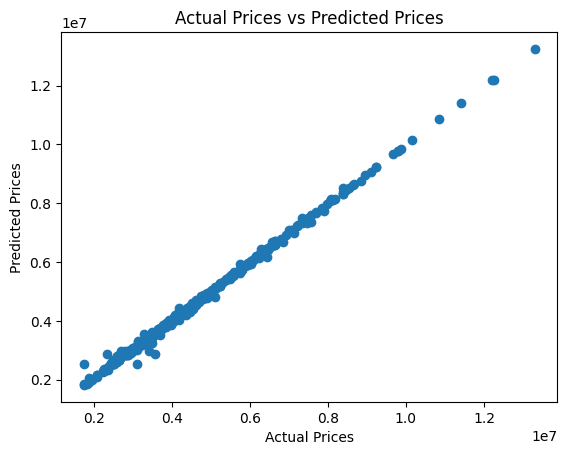

In [22]:
plt.scatter(y_train , training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()